In [1]:
pip install yfinance

In [2]:
import yfinance as yf
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [3]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
google_data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2005-06-06,7.212179,7.281837,6.986349,7.000231,904413304
2005-06-07,7.266219,7.426605,7.196314,7.364881,976566743
2005-06-08,6.930078,7.267955,6.891407,7.259527,1031889331
2005-06-09,7.097404,7.151693,6.954867,7.057990,660109011
2005-06-10,7.002958,7.121450,6.941480,7.114261,509767599


In [5]:
google_data.shape

(5031, 5)

In [6]:
google_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03
mean,52.009780,52.548257,51.459327,51.989761,9.954970e+07
std,49.319139,49.860369,48.782104,49.293660,1.263550e+08
min,6.381739,6.677476,6.130377,6.507421,1.584340e+05
25%,13.758519,13.956337,13.597018,13.790001,2.592025e+07
50%,29.326651,29.602132,29.066116,29.354985,4.640600e+07
75%,72.142056,72.679757,71.182097,72.023865,1.224533e+08
max,207.473633,208.462496,204.027547,204.267279,1.650833e+09


In [7]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5031 entries, 2005-06-06 to 2025-06-03
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5031 non-null   float64
 1   (High, GOOG)    5031 non-null   float64
 2   (Low, GOOG)     5031 non-null   float64
 3   (Open, GOOG)    5031 non-null   float64
 4   (Volume, GOOG)  5031 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.8 KB


In [8]:
google_data.isna().sum()

,,0
Price,Ticker,
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
print(google_data.columns)


MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])


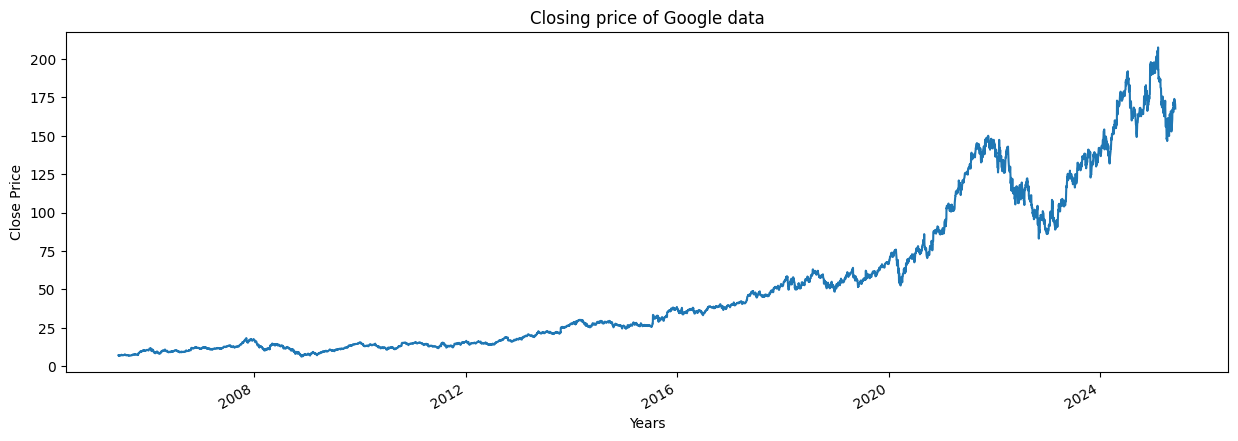

In [12]:
plt.figure(figsize=(15,5))
google_data[('Close', 'GOOG')].plot()
plt.xlabel("Years")
plt.ylabel("Close Price")
plt.title("Closing price of Google data")
plt.show()


In [13]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [14]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

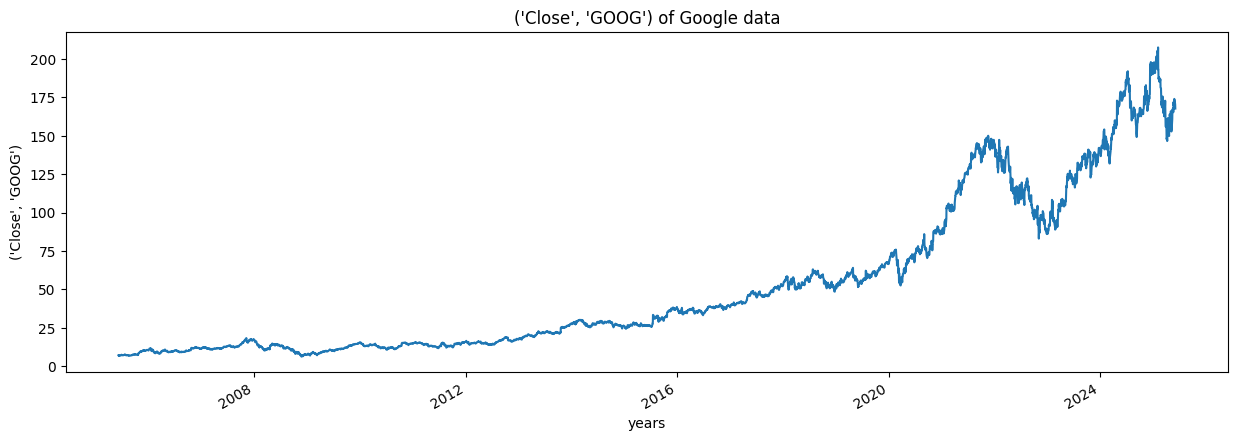

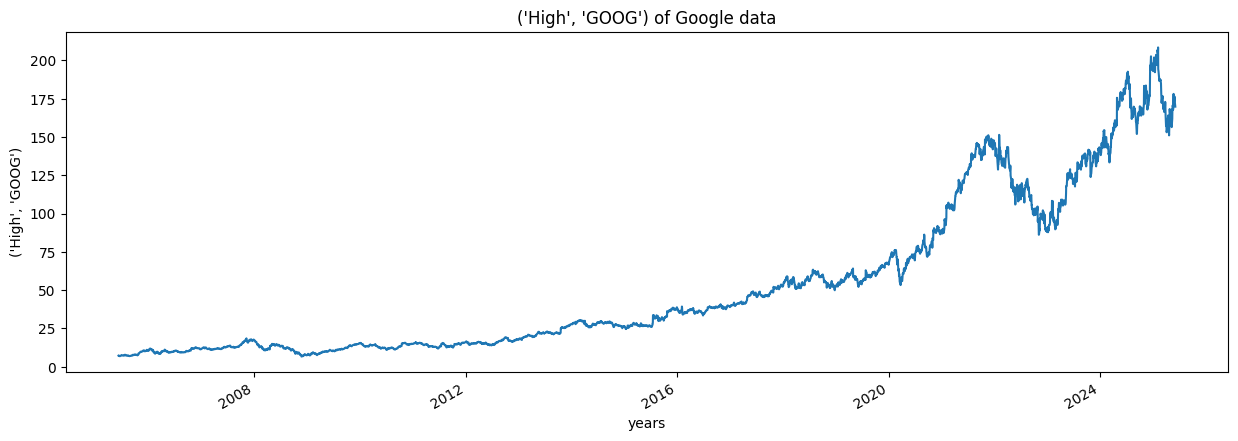

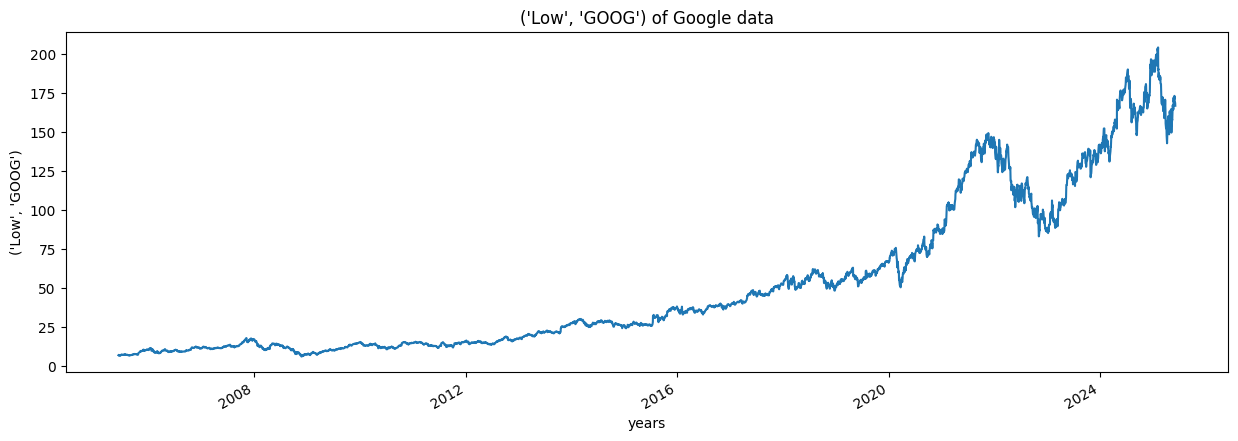

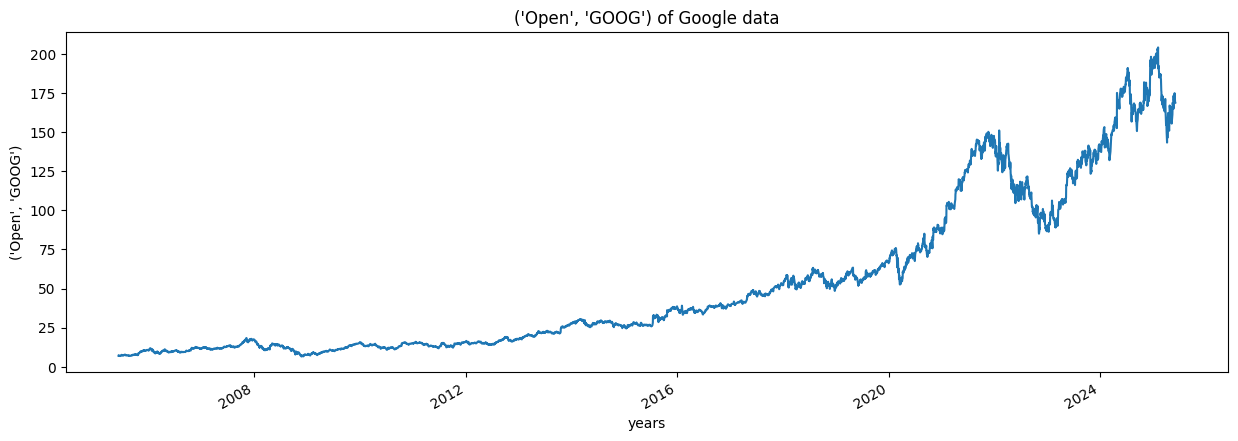

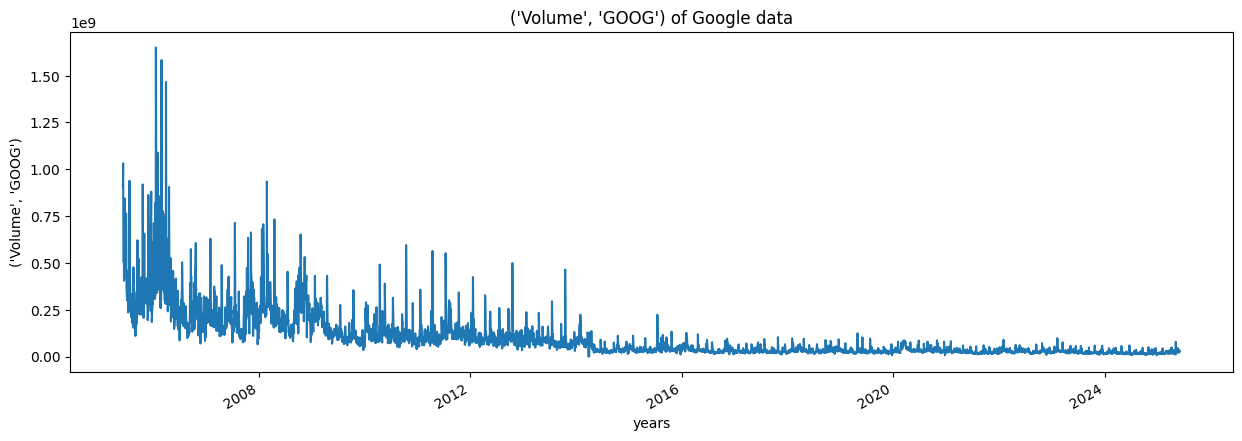

In [15]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [16]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [17]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)


40.0


In [18]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [19]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [20]:
google_data['MA_for_250_days'] = google_data['Close'].rolling(250).mean()


In [21]:
google_data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2006-05-25,NaN
2006-05-26,NaN
2006-05-30,NaN
2006-05-31,NaN
2006-06-01,8.850764


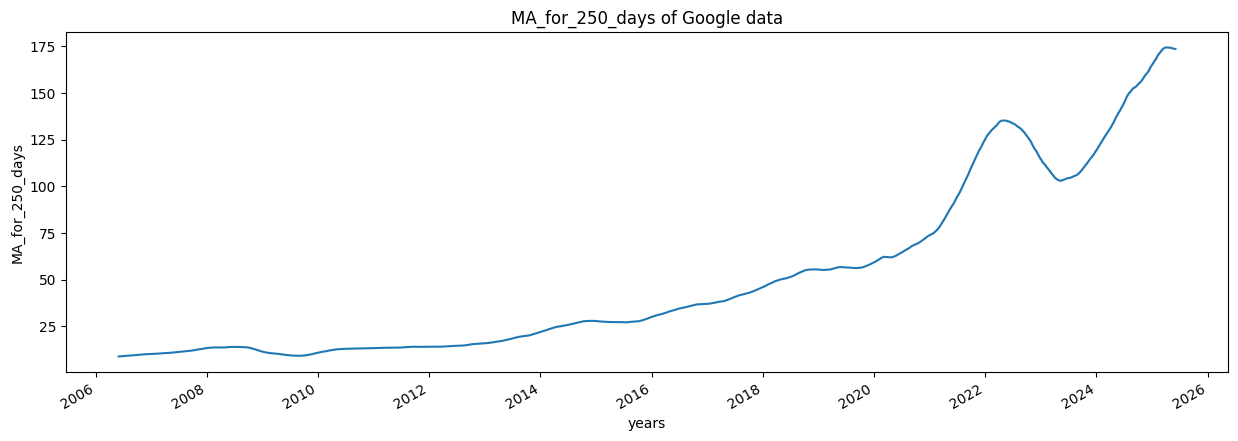

In [22]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

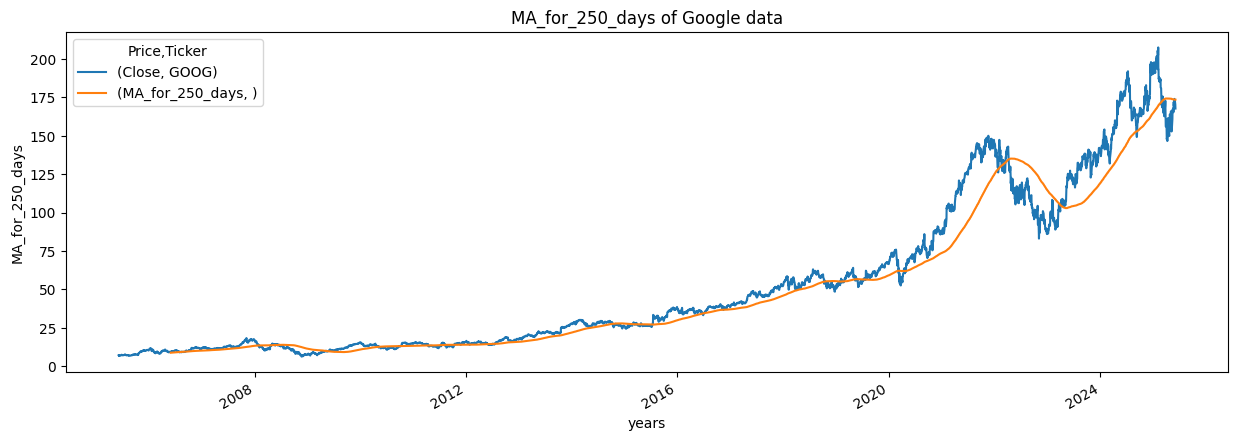

In [24]:
plot_graph((15,5), google_data[['Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

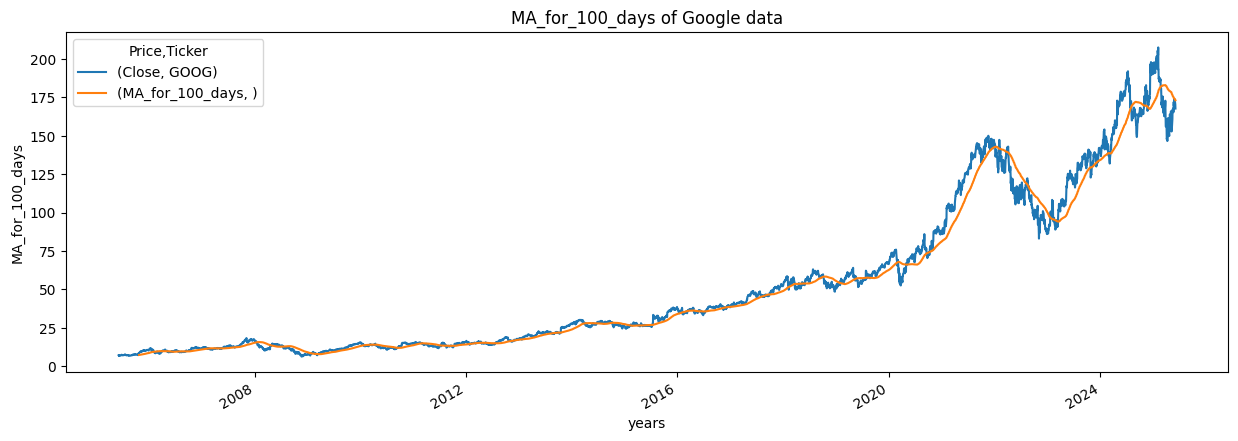

In [25]:
google_data['MA_for_100_days'] = google_data['Close'].rolling(100).mean()
plot_graph((15,5), google_data[['Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

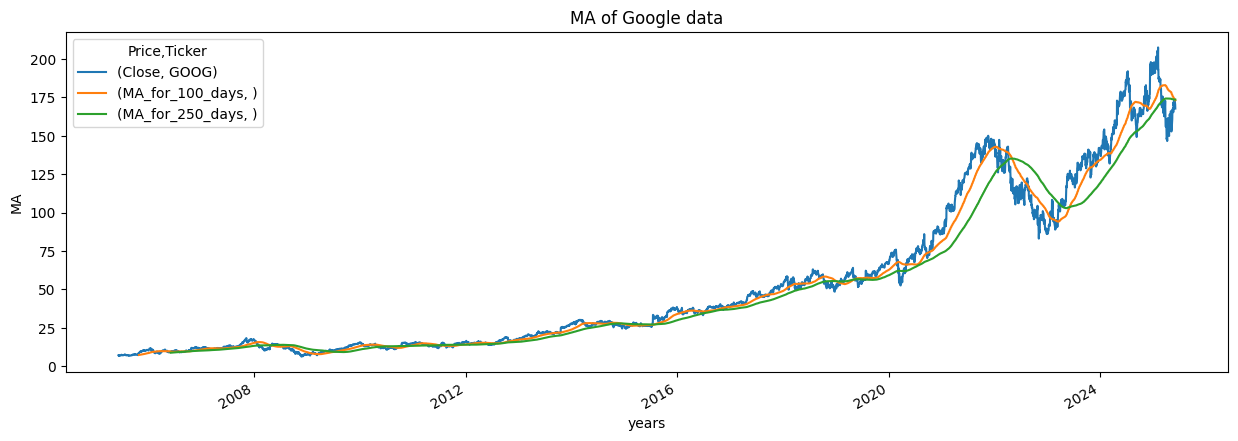

In [26]:
plot_graph((15,5), google_data[['Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [27]:
google_data['percentage_change_cp'] = google_data['Close'].pct_change()
google_data[['Close','percentage_change_cp']].head()

Price,Close,percentage_change_cp
Ticker,GOOG,
Date,,
2005-06-06,7.212179,NaN
2005-06-07,7.266219,0.007493
2005-06-08,6.930078,-0.046261
2005-06-09,7.097404,0.024145
2005-06-10,7.002958,-0.013307


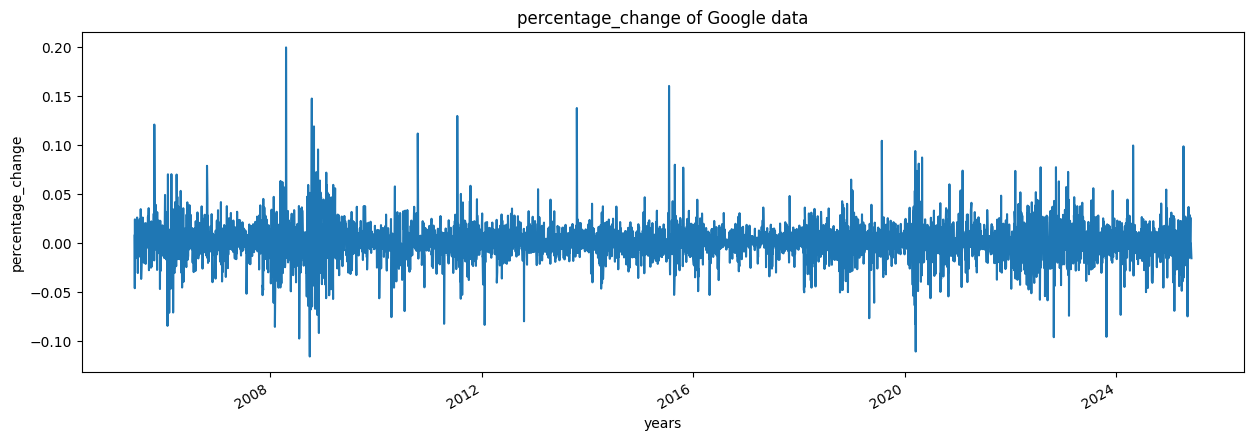

In [28]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [29]:
close_price = google_data[['Close']]
max(close_price.values),min(close_price.values)

(array([207.47363281]), array([6.38173914]))

In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_price)
scaled_data

array([[0.00412965],
       [0.00439838],
       [0.00272681],
       ...,
       [0.82782187],
       [0.81548914],
       [0.80226142]])

In [31]:
len(scaled_data)

5031

In [32]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [33]:
x_data[0],y_data[0]

(array([[0.00412965],
        [0.00439838],
        [0.00272681],
        [0.0035589 ],
        [0.00308923],
        [0.00312005],
        [0.00257764],
        [0.00214003],
        [0.00246546],
        [0.00281802],
        [0.00360698],
        [0.0037475 ],
        [0.00392748],
        [0.00397803],
        [0.00490751],
        [0.00575192],
        [0.00549305],
        [0.00434908],
        [0.00452536],
        [0.00416786],
        [0.00471767],
        [0.00420115],
        [0.00469671],
        [0.00478177],
        [0.00442674],
        [0.0042332 ],
        [0.00510598],
        [0.00535622],
        [0.0053932 ],
        [0.0051898 ],
        [0.00646691],
        [0.00672579],
        [0.00696494],
        [0.00554236],
        [0.00473493],
        [0.00476451],
        [0.00486806],
        [0.00444523],
        [0.00373765],
        [0.00421224],
        [0.00514666],
        [0.00491367],
        [0.00496668],
        [0.00430347],
        [0.00416786],
        [0

In [34]:
int(len(x_data)*0.7)

3451

In [35]:
4908-100-int(len(x_data)*0.7)

1357

In [36]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3451, 100, 1)
(3451, 1)
(1480, 100, 1)
(1480, 1)


In [38]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [39]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [41]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 34s 9ms/step - loss: 3.6330e-04
Epoch 2/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - loss: 8.1751e-05


In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [43]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [44]:
predictions

array([[0.2519884 ],
       [0.2529533 ],
       [0.25289443],
       ...,
       [0.81612456],
       [0.8163594 ],
       [0.81177527]], dtype=float32)

In [45]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 57.05457 ],
       [ 57.248596],
       [ 57.236763],
       ...,
       [170.49777 ],
       [170.545   ],
       [169.62317 ]], dtype=float32)

In [46]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 57.40709686],
       [ 57.04729843],
       [ 57.0463028 ],
       ...,
       [172.8500061 ],
       [170.36999512],
       [167.71000671]])

In [47]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [49]:
rmse

np.float64(3.039532302591794)

In [50]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-07-16,57.407097,57.054569
2019-07-17,57.047298,57.248596
2019-07-18,57.046303,57.236763
2019-07-19,56.238625,57.185535
2019-07-22,56.635250,56.853268


<Figure size 640x480 with 0 Axes>

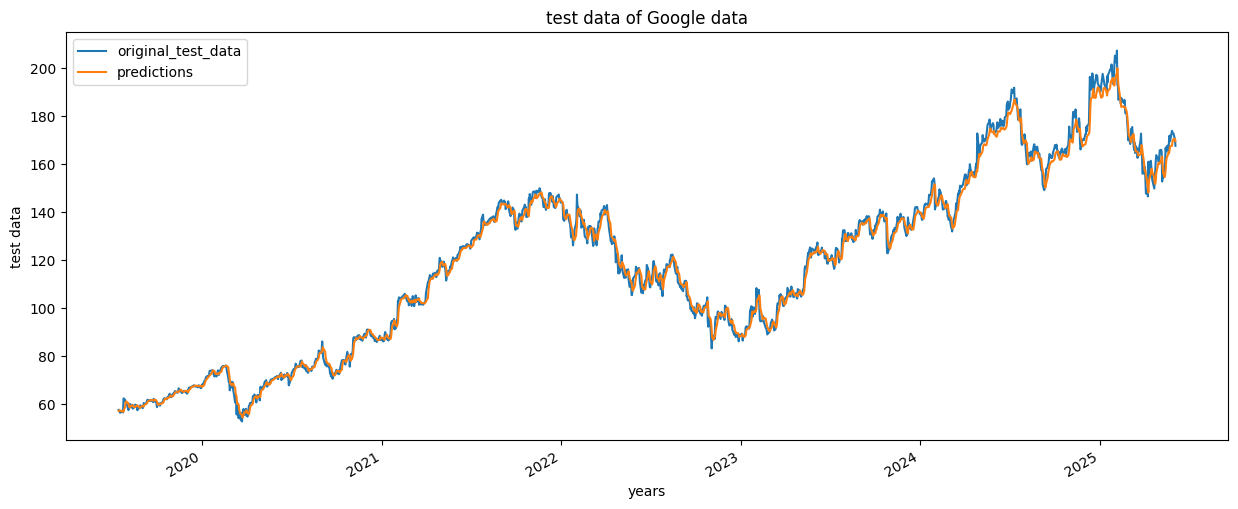

In [51]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

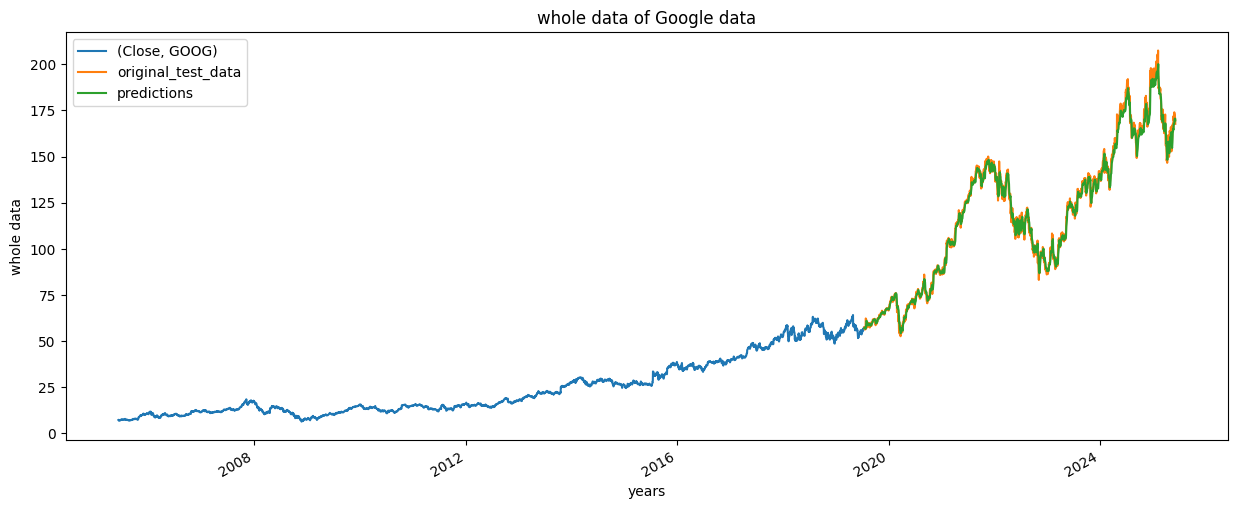

In [53]:
plot_graph((15,6), pd.concat([close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [54]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.8 MB/s eta 0:00:00


In [55]:
model.save("Latest_stock_price_model.keras")

In [56]:
pip install pyngrok


In [57]:
from pyngrok import ngrok

# Replace this with your actual ngrok authtoken
ngrok.set_auth_token('2qeS2wz8v3NZ1PqpZHEFd9jaysX_3FgqeDnLQahKSJx8EZY3d')


In [58]:
# Expose the Streamlit app to the internet
public_url = ngrok.connect(8501)
print('Streamlit app is live at:', public_url)

# Run Streamlit app
!streamlit run /content/web_stock_price_predictor.py

Streamlit app is live at: NgrokTunnel: "https://75d2-34-124-236-186.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.124.236.186:8501

2025-06-04 06:51:25.441220: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749019885.463986    5692 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749019885.470842    5692 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
YF.download() has changed argument auto_adjust default to True
[*********************100%***********************]  1 of 1 completed
2025-06-04 06:51: